# sprint 自然言語処理

## IMDB映画レビューデータセットを準備します。

In [1]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2020-03-27 16:12:28--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.2’

aclImdb_v1.tar.gz.2 100%[===================>]  80.23M  8.78MB/s    in 10s     

2020-03-27 16:12:38 (7.78 MB/s) - ‘aclImdb_v1.tar.gz.2’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include 

In [1]:
from sklearn.datasets import load_files
train_review = load_files('./example_acllmdb/aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./example_acllmdb/aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [2]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [3]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [5]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。

In [6]:
dataset = \
['This movie is SOOOO funny!!!',
 'What a movie! I never',
'best movie ever!!!!! this movie']

### 1-gram

In [7]:
datalist = []
for data in dataset:
    data = data.lower().replace('!', '').split(' ')
    datalist += data
clumns = list(set(datalist))

In [8]:
df1 = pd.DataFrame(index=[0, 1, 2], columns=clumns)
df1.iloc[:, :] = 0
df1

,a,i,ever,never,is,what,best,this,funny,movie,soooo
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0


In [9]:
for n, data in enumerate(dataset):
    data = data.lower().replace('!', '').split(' ')
    print(data)
    for word in data:
        df1.loc[n, word] += 1
df1

['this', 'movie', 'is', 'soooo', 'funny']
['what', 'a', 'movie', 'i', 'never']
['best', 'movie', 'ever', 'this', 'movie']


,a,i,ever,never,is,what,best,this,funny,movie,soooo
0,0,0,0,0,1,0,0,1,1,1,1
1,1,1,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,2,0


### 2-gram

In [10]:
datalist = []
for data in dataset:
    data = data.lower().replace('!', '').split(' ')
    for n in range(len(data)):
        word = data[n:n+2]
        gram = ','.join(word).replace(',', ' ')
        if len(word)!=1:
            datalist.append(gram)
clumns = list(set(datalist))

In [11]:
df2 = pd.DataFrame(index=[0, 1, 2], columns=clumns)
df2.iloc[:, :] = 0
for m, data in enumerate(dataset):
    data = data.lower().replace('!', '').split(' ')
    for n in range(len(data)):
        word = data[n:n+2]
        gram = ','.join(word).replace(',', ' ')
        print(gram)
        if len(word)!=1:
            df2.loc[m, gram] += 1
df2

this movie
movie is
is soooo
soooo funny
funny
what a
a movie
movie i
i never
never
best movie
movie ever
ever this
this movie
movie


,ever this,a movie,movie is,what a,soooo funny,is soooo,movie i,movie ever,this movie,i never,best movie
0,0,0,1,0,1,1,0,0,1,0,0
1,0,1,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,1,1,0,1


### TF-IDF

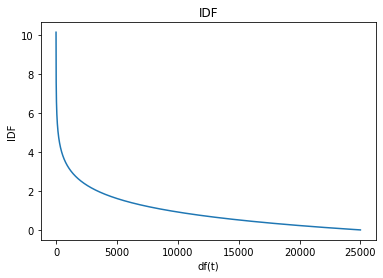

In [13]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [14]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [15]:
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
# トークンパターンは「１文字」も含める
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000, token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)
print(X_train.shape)
print(X_test.shape)

(25000, 5000)
(25000, 5000)


In [62]:
# スパース表現
X_train[0]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [63]:
# array表現
X_train[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

## 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
dt.score(X_test, y_test)

0.54436

### このままだとtrainとtestのボキャブラリが異なる

In [97]:
# testのTfidfVectorizerにてtrainと同じvocabularyを指定する
# train
vectorizer_train = TfidfVectorizer(stop_words=stop_words, max_features=5000, token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer_train.fit_transform(x_train)
# test
vocab = vectorizer_train.vocabulary_
vectorizer_test = TfidfVectorizer(stop_words=stop_words, max_features=5000, token_pattern=r'(?u)\b\w+\b', vocabulary=vocab)
X_test = vectorizer_test.fit_transform(x_test)
# 学習
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7136

### 上記をarrayで学習　→　時間がかかる、制度はほぼ同じ

In [109]:
# 学習
dt = DecisionTreeClassifier()
dt.fit(X_train.toarray(), y_train)
dt.score(X_test.toarray(), y_test)

0.71356

## 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

In [21]:
dataset

['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

In [22]:
df1

,a,i,ever,never,is,what,best,this,funny,movie,soooo
0,0,0,0,0,1,0,0,1,1,1,1
1,1,1,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,2,0


### 標準的な式

In [23]:
df_sum = df1.sum(axis=1)
f_tf = lambda x: x / df_sum
tf = df1.apply(f_tf)
tf

,a,i,ever,never,is,what,best,this,funny,movie,soooo
0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.2,0.2,0.2
1,0.2,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.2,0.0
2,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.2,0.0,0.4,0.0


In [24]:
idf = len(df1.index)/df1.sum(axis=0)
idf = idf.apply(np.log)
idf

a        1.098612
i        1.098612
ever     1.098612
never    1.098612
is       1.098612
what     1.098612
best     1.098612
this     0.405465
funny    1.098612
movie   -0.287682
soooo    1.098612
dtype: float64

In [25]:
tf_idf = tf*idf
tf_idf

,a,i,ever,never,is,what,best,this,funny,movie,soooo
0,0.000000,0.000000,0.000000,0.000000,0.219722,0.000000,0.000000,0.081093,0.219722,-0.057536,0.219722
1,0.219722,0.219722,0.000000,0.219722,0.000000,0.219722,0.000000,0.000000,0.000000,-0.057536,0.000000
2,0.000000,0.000000,0.219722,0.000000,0.000000,0.000000,0.219722,0.081093,0.000000,-0.115073,0.000000


### scikit-learnの採用している式

In [26]:
tf = df1
tf

,a,i,ever,never,is,what,best,this,funny,movie,soooo
0,0,0,0,0,1,0,0,1,1,1,1
1,1,1,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,2,0


In [27]:
idf = (1+len(df1.index))/(1+df1.sum(axis=0))
idf = idf.apply(np.log) + 1
idf

a        1.693147
i        1.693147
ever     1.693147
never    1.693147
is       1.693147
what     1.693147
best     1.693147
this     1.287682
funny    1.693147
movie    0.776856
soooo    1.693147
dtype: float64

In [28]:
tf_idf = tf*idf
tf_idf

,a,i,ever,never,is,what,best,this,funny,movie,soooo
0,0.000000,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,1.287682,1.693147,0.776856,1.693147
1,1.693147,1.693147,0.000000,1.693147,0.000000,1.693147,0.000000,0.000000,0.000000,0.776856,0.000000
2,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,1.693147,1.287682,0.000000,1.553713,0.000000


### Word2Vec

In [28]:
!pip install gensim

In [29]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[-0.0345      0.01149355  0.01947356  0.02000293  0.00733276  0.0248426
 -0.0046212  -0.03259641 -0.03076357 -0.00271019]
movieのベクトル : 
[-0.00283998 -0.02026069  0.04237908 -0.01767824 -0.04038054 -0.02791008
  0.03497395 -0.04455592  0.00837884  0.02436826]
isのベクトル : 
[-0.04966769  0.00066148  0.03030422  0.03139699 -0.04619208  0.00361338
  0.00733093  0.03147477  0.01779653 -0.0148257 ]
veryのベクトル : 
[-0.04985868 -0.0342035  -0.038185   -0.04977809  0.03469932  0.01631632
  0.0363913   0.0439475   0.00794609  0.03000161]
goodのベクトル : 
[-0.00934739  0.01637968  0.01327083  0.03420104  0.04299433 -0.0241556
  0.04958706 -0.00575929 -0.0019197   0.03124809]
filmのベクトル : 
[-0.03078647  0.03145029  0.02114402  0.01428355 -0.01355609  0.04500811
  0.02549366 -0.04302013 -0.01963614 -0.00419272]
aのベクトル : 
[ 4.4650637e-02  1.5384457e-02  2.5530977e-02  1.5725669e-02
  4.0512655e-02 -4.5872130e-03  3.802

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [30]:
model.wv.most_similar(positive="good", topn=3)

[('a', 0.6541959047317505),
 ('bad', 0.31350910663604736),
 ('this', 0.18209701776504517)]

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


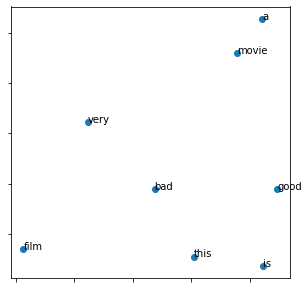

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [286]:
len(x_train)

25000

In [287]:
x_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [288]:
import re

In [289]:
def pre(x):
    pattern_html = r'<br /><br />'
    pattern = r'[^a-zA-Z0-9_ ]'

    p_html = re.compile(pattern_html)
    p = re.compile(pattern)
#     result = p.sub('', text)
    result = [p_html.sub('', x[i]) for i in range(len(x))] 
    result = [p.sub('', result[i]) for i in range(len(result))] 
    return result


In [290]:
X_train = pre(x_train)
X_train[0]

'Zero Day leads you to think even rethink why two boysyoung men would do what they did  commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their ownmutual world via coupled destructionIt is not a perfect movie but given what moneytime the filmmaker and actors had  it is a remarkable product In terms of explaining the motives and actions of the two young suicidemurderers it is better than Elephant  in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty'

In [291]:
datalist = []
for data in X_train:
    data = data.lower().split()
    datalist.append(data)
X_train = datalist
X_train[0]

['zero',
 'day',
 'leads',
 'you',
 'to',
 'think',
 'even',
 'rethink',
 'why',
 'two',
 'boysyoung',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'their',
 'classmates',
 'it',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'a',
 'bizarre',
 'mode',
 'of',
 'being',
 'for',
 'two',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'order',
 'to',
 'define',
 'their',
 'ownmutual',
 'world',
 'via',
 'coupled',
 'destructionit',
 'is',
 'not',
 'a',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'moneytime',
 'the',
 'filmmaker',
 'and',
 'actors',
 'had',
 'it',
 'is',
 'a',
 'remarkable',
 'product',
 'in',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicidemurderers',
 'it',
 'is',
 'better',
 'than',
 'elephant',
 'in',
 'terms',
 'of',
 'being',
 'a',
 'film',
 'that',
 'gets',
 'under',
 'our',
 

In [292]:
X_test = pre(x_test)
datalist = []
for data in X_test:
    data = data.lower().split()
    datalist.append(data)
X_test = datalist
X_test[0]

['dont',
 'hate',
 'heather',
 'graham',
 'because',
 'shes',
 'beautiful',
 'hate',
 'her',
 'because',
 'shes',
 'fun',
 'to',
 'watch',
 'in',
 'this',
 'movie',
 'like',
 'the',
 'hip',
 'clothing',
 'and',
 'funky',
 'surroundings',
 'the',
 'actors',
 'in',
 'this',
 'flick',
 'work',
 'well',
 'together',
 'casey',
 'affleck',
 'is',
 'hysterical',
 'and',
 'heather',
 'graham',
 'literally',
 'lights',
 'up',
 'the',
 'screen',
 'the',
 'minor',
 'characters',
 'goran',
 'visnjic',
 'sigh',
 'and',
 'patricia',
 'velazquez',
 'are',
 'as',
 'talented',
 'as',
 'they',
 'are',
 'gorgeous',
 'congratulations',
 'miramax',
 'director',
 'lisa',
 'krueger']

## 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [293]:
# train
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(X_train) # 準備
model.train(X_train, total_examples=model.corpus_count, epochs=model.iter) # 学習
# print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
# for vocab in model.wv.vocab.keys():
#     print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(21756733, 28595965)

In [294]:
# 最初の４つまで出力
for n, vocab in enumerate(model.wv.vocab.keys()):
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))
    if n==3:
        break

zeroのベクトル : 
[-0.267632    0.0089806   0.87021494 -0.3343937  -1.9290638  -1.6401845
  0.9287867  -2.9775515  -1.5659125   1.011866  ]
dayのベクトル : 
[-0.51286596 -1.6979433  -0.7816006  -0.01578126 -2.707364   -3.3917587
  2.795574    0.9564264  -1.0934297  -3.654832  ]
leadsのベクトル : 
[-3.220573    0.08896402  2.7857451  -1.9198328  -2.062585    2.7985315
  1.6511245   2.717811    0.11155832  1.2840245 ]
youのベクトル : 
[ 1.0949671 -5.825855  -1.3243526  0.9721661  2.8394442 -3.3042245
  5.7681584 -4.3595347 -9.966956  -2.5409455]


In [295]:
# test
# 単語はtestに合わせる
model2 = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model2.build_vocab(X_train) # 準備
model2.train(X_test, total_examples=model.corpus_count, epochs=model.iter) # 学習
# print("語彙の一覧 : {}".format(model2.wv.vocab.keys()))
# for vocab in model2.wv.vocab.keys():
#     print("{}のベクトル : \n{}".format(vocab, model2.wv[vocab]))

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(20700286, 27952320)

In [296]:
# 最初の４つまで出力
for n, vocab in enumerate(model2.wv.vocab.keys()):
    print("{}のベクトル : \n{}".format(vocab, model2.wv[vocab]))
    if n==3:
        break

zeroのベクトル : 
[-2.2451315  -0.7317709   1.9840859  -0.85238415 -0.9676481  -0.4998648
  1.3109946  -0.73871255 -1.9488497  -0.03292607]
dayのベクトル : 
[ 0.01293691 -0.34615064 -2.824147    1.1016601  -0.38336244 -2.2411523
  5.1874475   0.19104926  0.4951742  -0.44776207]
leadsのベクトル : 
[-1.6299055   0.5992495   0.20180775 -2.088593   -1.8079739   2.9082558
  1.2583594   0.9159394   1.9634035   4.9929256 ]
youのベクトル : 
[ -1.0589085  -4.820477   -1.5369465  -1.4415019   2.053514   -1.1383114
   6.10215   -10.028738   -5.9846797  -2.7321632]


## 【問題7】（アドバンス課題）ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


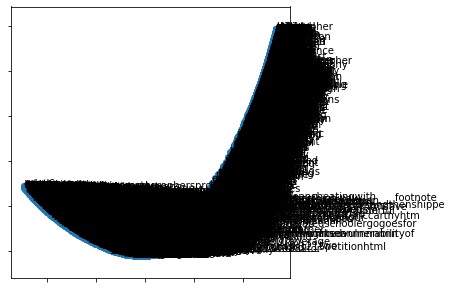

In [53]:
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=250, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [146]:
model.wv.most_similar(positive="good", topn=3)

[('pointlessthe', 0.9526289105415344),
 ('horrible', 0.9400007724761963),
 ('terrible', 0.9346954226493835)]

## 【問題8】（アドバンス課題）Word2Vecを用いた映画レビューの分類
問題6で学習して得たベクトルや公開されている学習済みベクトルを用いてIMDB映画レビューデータセットの感情分類の学習・推定を行なってください。